# Problem 1: Digit Recognizer

(a) Join the Digit Recognizer competition on Kaggle. Download the training and test data. The
competition page describes how these files are formatted.

The traning data contains 785 columns and 42001 rows, with the first row being the header, the first column being the labels (from 0 to 9), and the rest of the columns being features.
The test data contains 784 colmns and 28001 rows, the first row being the header and the rest being features. We are asked to classify each row into a digit from 0 to 9.

(b) Write a function to display an MNIST digit. Display one of each digit.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
% matplotlib inline

#load data
data = np.loadtxt('train.csv', dtype=np.int32, delimiter=',', skiprows=1)
test_data = np.loadtxt('test.csv', dtype=np.int32, delimiter=',', skiprows=1)
dimension = int(data[1,1:].shape[0] ** 0.5)

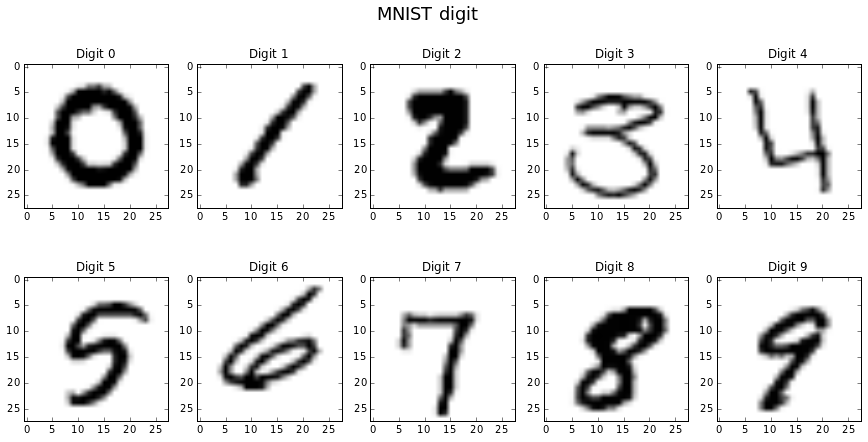

In [2]:
import time

def displayDigit(data, dimension):
    plt.figure(figsize = (15, 7))
    plt.suptitle('MNIST digit', fontsize=18)
    index_rows = []
    for index in range(10):
        index_rows = data[data[:,0] == index, :]
        pixels = index_rows[0, 1:].reshape((dimension, dimension))
        plt.subplot(2, 5, index + 1)
        plt.title('Digit {label}'.format(label = index))
        plt.imshow(pixels, cmap='binary')

def displayDigitTwo(data, dimension):
    sample_data = data[np.random.choice(data.shape[0], 1000, replace=False), :] #downsample to improve runtime
    plt.figure(figsize = (15, 7))
    plt.suptitle('MNIST digit', fontsize=18)
    row_index = 0
    label = 0
    while True:
        current_label = sample_data[row_index, 0]
        if current_label == label:
            plt.subplot(2, 5, label + 1)
            plt.title('Digit {label}'.format(label=label))
            plt.imshow(sample_data[row_index, 1:].reshape((dimension, dimension)), cmap='binary')
            label += 1
        if label > 9:
            break
        row_index += 1
displayDigit(data, dimension)       
#displayDigitTwo(data, dimension)

(c) Examine the prior probability of the classes in the training data. Is it uniform across the
digits? Display a normalized histogram of digit counts. Is it even?

The distribution of the digits are mostly uniform with one being the highest occured number (11.2%) and five being the lowest occured number (9.0%).

In [3]:
def displayHistogram(data):
    prior = []
    sample_size = float(data.shape[0])
    for i in range(10):
        prior.append((data[data[:, 0] == i, :]).shape[0] / sample_size)
    plt.title("Prior Probability vs. Digit")
    plt.xlabel("Digit")
    plt.ylabel("Prior Probability")
    plt.xticks(range(10))
    plt.bar(range(10), prior, 0.75, color = "blue")
    print "prior distribution max: {0}%".format(max(prior)*100)
    print "prior distribution min: {0}%".format(min(prior)*100)

prior distribution max: 11.1523809524%
prior distribution min: 9.03571428571%


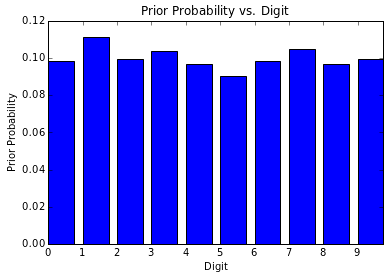

In [4]:
displayHistogram(data)

(d) Pick one example of each digit from your training data. Then, for each sample digit, compute
and show the best match (nearest neighbor) between your chosen sample and the rest of
the training data. Use L2 distance between the two images’ pixel values as the metric. This
probably won’t be perfect, so add an asterisk next to the erroneous examples (if any).

In [5]:
def kNN(training_data, test_data, k):
    neighbors = np.sqrt(np.sum((training_data - test_data)**2, axis = 1))
    best_match = neighbors.argsort()[:k + 1][1:] # best K matches (excluding itself)
    label = data[best_match, 0]
    cnt = Counter()
    top_vote = Counter(label).most_common(1)[0][0]
    return top_vote, best_match


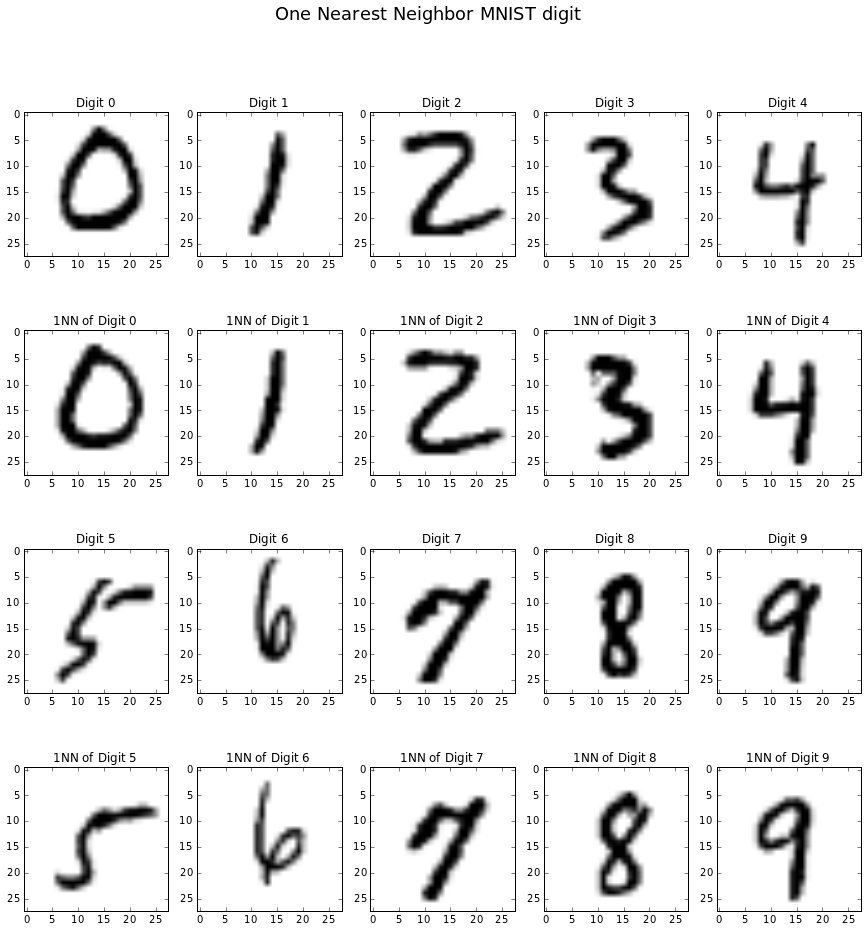

In [6]:
sample_data = data[np.random.choice(data.shape[0], 1000, replace=False), :] #downsample to improve runtime
plt.figure(figsize = (15, 15))
plt.suptitle('One Nearest Neighbor MNIST digit', fontsize=18)
row_index = 0
label = 0
while True:
    current_label = sample_data[row_index, 0]
    if current_label == label:
        top_vote, best_match = kNN(data[:,1:], sample_data[row_index, 1:], 1)
        plt.subplot(4, 5, current_label+1+5*(current_label//5))
        plt.title('Digit {label}'.format(label=label))
        plt.imshow(sample_data[row_index, 1:].reshape((dimension, dimension)), cmap='binary')
        plt.subplot(4, 5, current_label+1+5*(current_label//5+1))
        if current_label == top_vote:
            plt.title('1NN of Digit {label}'.format(label=label))
        else:
            plt.title('1NN of Digit {label}, True label {top_vote}*'.format(label=label, top_vote=top_vote))
        plt.imshow(data[best_match[0], 1:].reshape((dimension, dimension)), cmap='binary')
        
        label += 1
    if label > 9:
        break
    row_index += 1

As you can see, in this sample, we have miss classified digit 9

(e) Consider the case of binary comparison between the digits 0 and 1. Ignoring all the other
digits, compute the pairwise distances for all genuine matches and all impostor matches,
again using the L2 norm. Plot histograms of the genuine and impostor distances on the same
set of axes.

In [7]:
# data only contains 1
ones = data[data[:,0] == 1][:,1:]
# data only contains 0
zeros = data[data[:,0] == 0][:,1:]
# genuine between 1 and 1
def l2_matrix(x, y):
    m = x.shape[0]
    n = y.shape[0]
    x2 = np.sum(x**2, axis=1).reshape((m, 1))
    y2 = np.sum(y**2, axis=1).reshape((1, n))
    xy = x.dot(y.T) 
    dists = np.sqrt(x2 + y2 - 2*xy)
    return dists

ones_genuine = l2_matrix(ones, ones)
zeros_genuine = l2_matrix(zeros, zeros)
impostor_matches = l2_matrix(zeros, ones)


In [8]:
ones_upper = ones_genuine[np.triu_indices(ones_genuine.shape[0],1)]
zeros_upper = zeros_genuine[np.triu_indices(zeros_genuine.shape[0],1)]
genuine = np.concatenate((ones_upper, zeros_upper), axis=0)
impostor = impostor_matches.flatten()

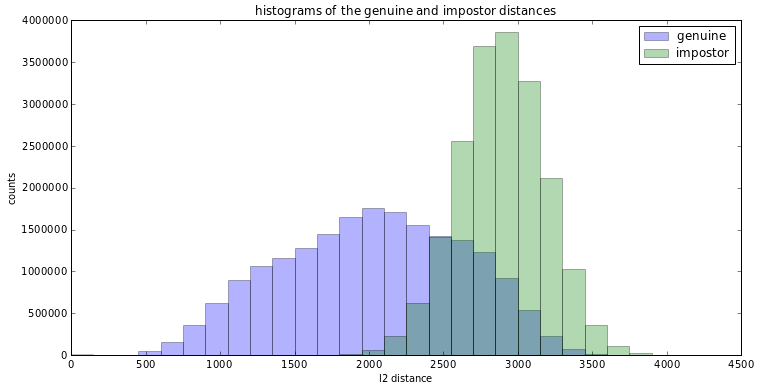

In [9]:
plt.figure(figsize = (12, 6))
_n, _bins, _ = plt.hist(genuine, label='genuine',alpha=0.3, range=(0, 4500), bins=30)
_n2, _bins2, _ = plt.hist(impostor, label='impostor',alpha=0.3, range=(0, 4500), bins=30)
plt.xlabel('l2 distance')
plt.ylabel('counts')
plt.title('histograms of the genuine and impostor distances')
plt.legend()

As you can see when l2 distance reaches 2000 we start to see some impostor classifications

(f) Generate an ROC curve from the above sets of distances. What is the equal error rate? Whatis the error rate of a classifier that simply guesses randomly?

In [10]:
len_gen = float(len(genuine))
len_imp = float(len(impostor))
tpr = []
fpr = []
for thresh in xrange(200, 4200, 5):
    tpr.append(np.count_nonzero(genuine < thresh) / len_gen)
    fpr.append(np.count_nonzero(impostor < thresh) / len_imp)

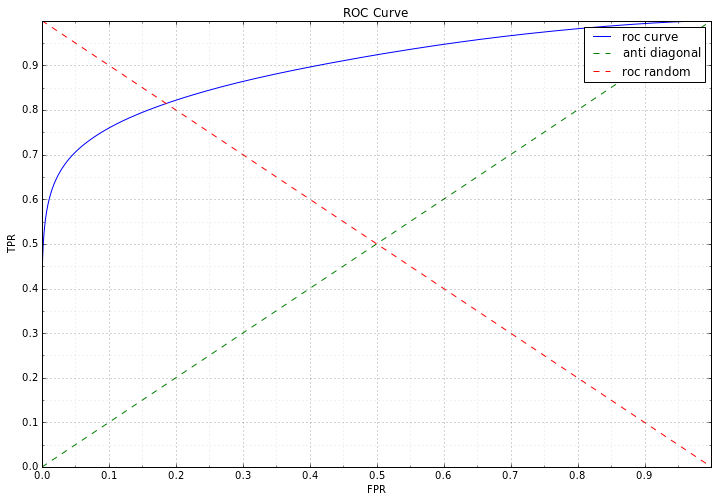

In [11]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot(111)
ax.plot(fpr, tpr, label='roc curve')
ax.set_ylabel('TPR')
ax.set_xlabel('FPR')
ax.set_title('ROC Curve')
ax.plot([0, 1], [0, 1], color='green', linestyle='--', label='anti diagonal')
ax.plot([0, 1], [1, 0], color='red', linestyle='--', label='roc random')


major_ticks = np.arange(0, 1, 0.1)                                              
minor_ticks = np.arange(0, 1, 0.05)                                               

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)                                                       
ax.set_yticks(minor_ticks, minor=True)  
ax.grid(which='both')
ax.grid(which='minor', alpha=0.2)                                                
ax.grid(which='major', alpha=0.5) 
ax.legend()
# major ticks every 20, minor ticks every 5                                      

The equal error rate is the intersection between the anti diagonal and roc curve, its approximately 0.18. The random guess accuracy is 0.5.

(g) Implement a K-NN classifier. (You cannot use external libraries for this question; it shouldbe your own implementation.)

In [12]:
def l2_matrix(x, y):
    m, n= x.shape[0], y.shape[0]
    x2 = np.sum(x**2, axis=1).reshape((m, 1))
    y2 = np.sum(y**2, axis=1).reshape((1, n))
    dist_matrix = np.sqrt(x2 + y2 - 2*(x.dot(y.T)))
    return dist_matrix

def get_majority_vote(a):
    majority_vote = Counter(a).most_common(1)[0][0]
    return majority_vote
    
def kNN(training_data, test_data, k, label_data):
    # step one: do matrix multiplication get a matrix of l2 distance
    dist_matrix = l2_matrix(test_data, training_data)
    
    # step two: for each comparision keep the top k and its index
    least_k_indices = dist_matrix.argsort(axis=1)[:,:k]
    labels = label_data[least_k_indices.flatten()].reshape((test_data.shape[0], k))
    
    #step three: get majority votes
    classification_result = np.apply_along_axis(get_majority_vote, 1, labels)
    
    return classification_result

implementation: in order to make the most use of RAM space, and save more computation time. I compute multiple test data at once using matrix multiplication. I first create a matrix of l2 distance, then pick the nearest k item, then return the top voted label.

(h) Using the training data for all digits, perform 3 fold cross-validation on your K-NN classifierand report your average accuracy.

In [23]:
from sklearn.cross_validation import KFold

def knn_cross_validate(data, n_folds, k):
    kf = KFold(data.shape[0], n_folds=n_folds)
    accuracy = 0
    for train_index, test_index in kf:
        train, test = data[train_index], data[test_index]
        classification_result = kNN(train[:,1:], test[:,1:], k, train[:,0])
        accuracy += np.count_nonzero(classification_result == test[:,0])/float(len(test[:,0]))
    return accuracy/n_folds

for i in range(0, 10):
    print "computing {0}-NN 3 fold cross validation".format(i*2 + 1)
    average_acc = knn_cross_validate(data, 3, i*2 + 1)
    print "average accuracy for {0}-NN 3 fold cross validation is {1}".format(i*2 + 1, average_acc)


computing 1-NN 3 fold cross validation
average accuracy for 1-NN 3 fold cross validation is 0.964380952381
computing 3-NN 3 fold cross validation
average accuracy for 3-NN 3 fold cross validation is 0.966166666667
computing 5-NN 3 fold cross validation
average accuracy for 5-NN 3 fold cross validation is 0.965619047619
computing 7-NN 3 fold cross validation
average accuracy for 7-NN 3 fold cross validation is 0.96380952381
computing 9-NN 3 fold cross validation
average accuracy for 9-NN 3 fold cross validation is 0.962285714286
computing 11-NN 3 fold cross validation
average accuracy for 11-NN 3 fold cross validation is 0.960285714286
computing 13-NN 3 fold cross validation
average accuracy for 13-NN 3 fold cross validation is 0.958047619048
computing 15-NN 3 fold cross validation
average accuracy for 15-NN 3 fold cross validation is 0.956261904762
computing 17-NN 3 fold cross validation
average accuracy for 17-NN 3 fold cross validation is 0.954666666667
computing 19-NN 3 fold cross v

(i)  Generate a confusion matrix (of size 10x10) from your results. Which digits are particularly tricky to classify?

In [41]:
confusion_matrix = []
for digit in range(0, 10):
    test_data = data[[data[:,0] == digit]]
    i_th_results = kNN(data[:,1:], test_data[:,1:], 3, data[:,0])
    confusion_matrix.append(dict(Counter(i_th_results)))
    

In [42]:
matrix = []
for classification_result in confusion_matrix:
    row = []
    for digit in range(0, 10):
        if digit in classification_result:
            row.append(classification_result[digit])
        else:
            row.append(0)
    matrix.append(row)
print matrix
print np.array(matrix)


[[4122, 0, 1, 0, 0, 3, 6, 0, 0, 0], [0, 4672, 4, 0, 1, 0, 0, 4, 1, 2], [17, 20, 4098, 3, 1, 1, 1, 23, 7, 6], [3, 4, 14, 4258, 0, 25, 0, 11, 20, 16], [3, 28, 0, 0, 3997, 0, 5, 1, 0, 38], [6, 2, 0, 22, 1, 3717, 23, 0, 9, 15], [14, 5, 0, 0, 4, 8, 4104, 0, 2, 0], [1, 35, 10, 0, 2, 0, 0, 4328, 0, 25], [4, 23, 3, 15, 7, 18, 7, 3, 3960, 23], [9, 5, 1, 11, 23, 3, 2, 27, 7, 4100]]
[[4122    0    1    0    0    3    6    0    0    0]
 [   0 4672    4    0    1    0    0    4    1    2]
 [  17   20 4098    3    1    1    1   23    7    6]
 [   3    4   14 4258    0   25    0   11   20   16]
 [   3   28    0    0 3997    0    5    1    0   38]
 [   6    2    0   22    1 3717   23    0    9   15]
 [  14    5    0    0    4    8 4104    0    2    0]
 [   1   35   10    0    2    0    0 4328    0   25]
 [   4   23    3   15    7   18    7    3 3960   23]
 [   9    5    1   11   23    3    2   27    7 4100]]


Confusion matrix, without normalization
[[4122    0    1    0    0    3    6    0    0    0]
 [   0 4672    4    0    1    0    0    4    1    2]
 [  17   20 4098    3    1    1    1   23    7    6]
 [   3    4   14 4258    0   25    0   11   20   16]
 [   3   28    0    0 3997    0    5    1    0   38]
 [   6    2    0   22    1 3717   23    0    9   15]
 [  14    5    0    0    4    8 4104    0    2    0]
 [   1   35   10    0    2    0    0 4328    0   25]
 [   4   23    3   15    7   18    7    3 3960   23]
 [   9    5    1   11   23    3    2   27    7 4100]]
Normalized confusion matrix
[[  9.97579864e-01   0.00000000e+00   2.42013553e-04   0.00000000e+00
    0.00000000e+00   7.26040658e-04   1.45208132e-03   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   9.97438087e-01   8.53970965e-04   0.00000000e+00
    2.13492741e-04   0.00000000e+00   0.00000000e+00   8.53970965e-04
    2.13492741e-04   4.26985482e-04]
 [  4.06990663e-03   4.78812545e-03   9.8108690

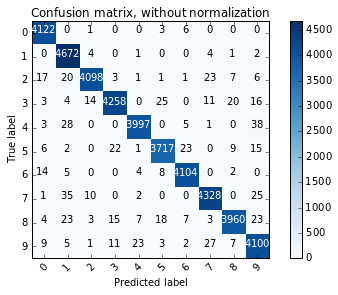

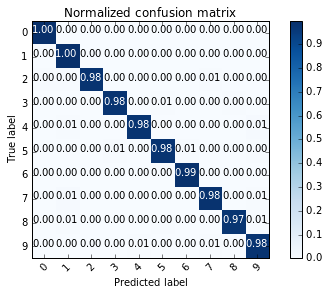

In [43]:
# Plot non-normalized confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(np.array(matrix), classes=range(0,10),
                      title='Confusion matrix, without normalization')

# # Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(np.array(matrix), classes=range(0,10), normalize=True,
                       title='Normalized confusion matrix')

# plt.show()

(j)  Train your classifier with all of the training data, and test your classifier with the test data. Submit your results to Kaggle.

In [13]:
classification_result = kNN(data[:,1:], test_data, 3, data[:,0])

In [19]:
with open("submission.txt", "wb") as f:
    f.write("ImageId,Label\n")
    label_id = 0
    for item in classification_result:
        label_id += 1
        f.write("{0},{1}".format(str(label_id),str(item)))
        f.write("\n")